In [1]:
import pandas as pd 
import numpy as np 
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..")
from TimeSeries_utils import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/home/workspace/DACON/BitCoin/data/train.csv')

In [3]:
df = datetime_process(df, 'Time')

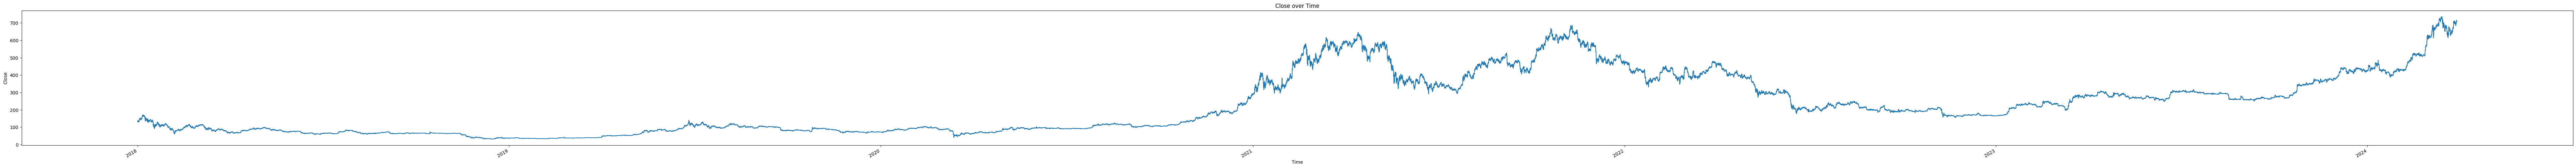

In [32]:
# 시간에 따른 가격 플롯
plt.figure(figsize=(100, 6))
plt.plot(df['Time'], df['Close'])

# 그래프 제목 및 축 레이블 설정
plt.title('Close over Time')
plt.xlabel('Time')
plt.ylabel('Close')

# X축 날짜 형식 지정
plt.gcf().autofmt_xdate()

# 그래프 표시
plt.show()

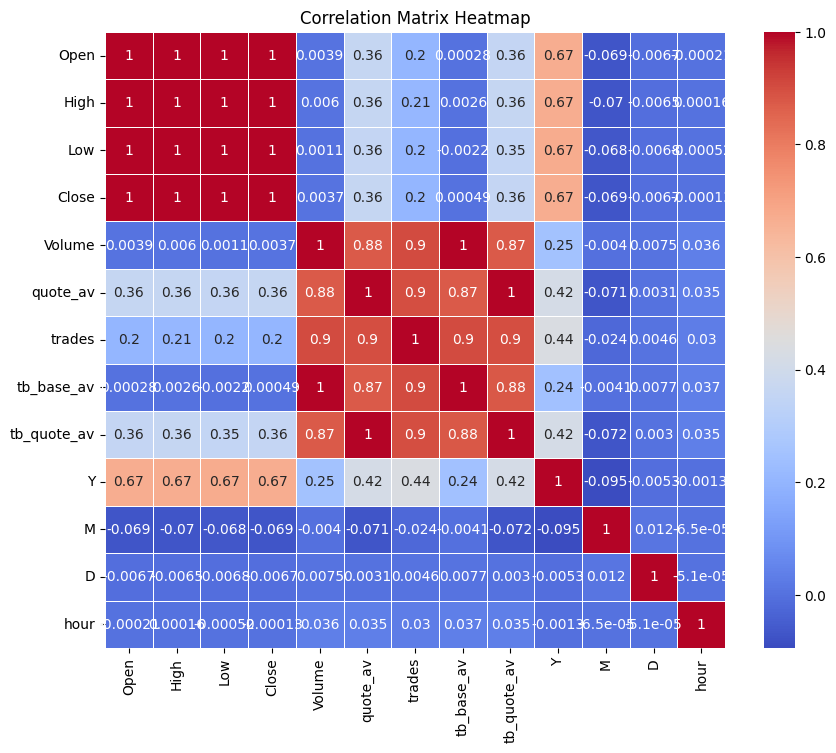

In [15]:
df = df.drop(columns=['Time','Day_name'])
corr_matrix = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# 그래프 제목 설정
plt.title('Correlation Matrix Heatmap')

# 그래프 표시
plt.show()

In [ ]:
# Month, Day, Hour은 제외한다.  
# quote_av, tb_quote_av 열 잘건드리면 성능이 오를 것 같다. 
# volume과 quote_av, tb_quote_av을 잘 건드려보자. 
# 5시간 동안 평균 변화율이 큰지 작은지

In [16]:
df.tail()

,Open,High,Low,Close,Volume,quote_av,trades,tb_base_av,tb_quote_av,Y,M,D,hour
54569,705.49,709.13,704.82,707.98,1233.56939,871989.082208,82625,621.74521,439518.571710,2024,3,28,19
54570,707.98,708.75,706.19,706.73,754.73131,533942.900430,59964,357.79475,253144.400614,2024,3,28,20
54571,706.73,709.06,706.54,707.81,603.94141,427345.556770,45225,323.37064,228831.685668,2024,3,28,21
54572,707.81,708.81,705.41,708.47,789.63372,558802.030425,50729,391.55982,277113.932578,2024,3,28,22
54573,708.47,710.73,706.87,707.80,854.45575,605391.121388,60037,430.59359,305097.776542,2024,3,28,23


In [33]:
def ma_ema_feature(df, col_name, window_size):
    df[f'{col_name}_ma_{window_size}'] = df[col_name].rolling
    df[f'{col_name}_ema_{window_size}'] = 


SyntaxError: invalid syntax (2495470670.py, line 3)

In [35]:
col_name = 'Close'
window_size = 5
df[f'{col_name}_ma_{window_size}'] = df[col_name].rolling(window= window_size).mean()
df[f'{col_name}_ema_{window_size}'] = df[col_name].ewm(span= window_size, adjust=False).mean()

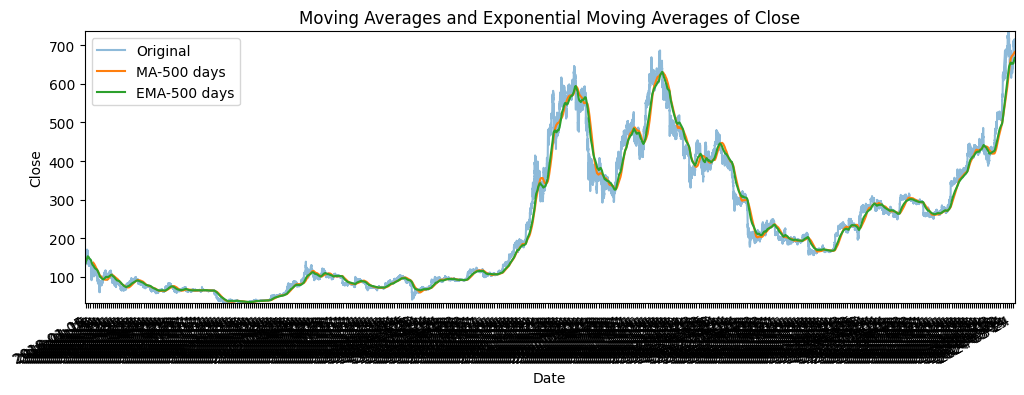

In [7]:
ma_ema_feature(df, col_name= 'Close', window_size= 500)